In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# Predicting Fish Weight
dataset: https://www.kaggle.com/aungpyaeap/fish-market

Humans have the ability to estimate the weight of a creature just with their eyes, can a machine learning model achieve the same or better accuracy as a human?

The goal for this dataset is to use the measurements that can be taken with a tape measure (or by eye) of a fish, and the species of the fish to predict the weight.


I will remove duplicate samples and samples with missing measurements. I will also convert the categorical 'Species' variable into numerical values.

I believe either the nearest neighbors or the random forest model will work the best with this dataset. It has few features and the data looks separated into clusters.

These models will be optimized by testing a range of values on the parameters until the optimal values are found.

I believe that a good accuracy would be an average absolute error of 10% of the total weight of the fish.

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/broswen/mcs-207/master/Fish.csv?token=AAQ5AHZTDPBMWECYYLK2EGK6FSHQ6')

In [0]:
df = df[df['Weight'] > 0]

In [124]:
enc = OneHotEncoder()
enc_species = pd.DataFrame(enc.fit_transform(df['Species'].values))
df = df.join(enc_species)

ValueError: ignored

Initialize data exploration and visualization.

sns.pairplot with all features

In [123]:
enc_species

,0
0,"(0, 0)\t1.0"
1,"(0, 0)\t1.0"
2,"(0, 0)\t1.0"
3,"(0, 0)\t1.0"
4,"(0, 0)\t1.0"
...,...
153,"(0, 5)\t1.0"
154,"(0, 5)\t1.0"
155,"(0, 5)\t1.0"
156,"(0, 5)\t1.0"


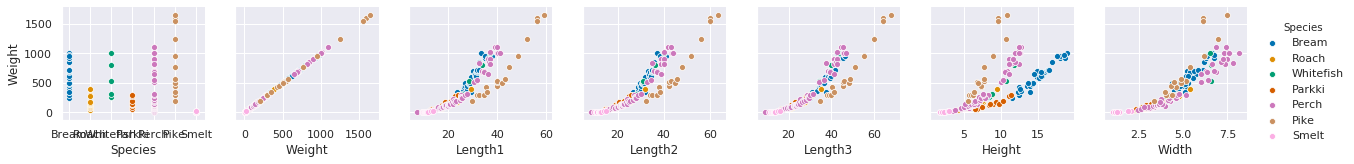

In [90]:
sns.pairplot(df, x_vars=df.columns[0:-1], y_vars=['Weight'], hue='Species', palette='colorblind')

sns.pairplot with the main features.

In [106]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width,enc_species
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,157.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232,2.242038
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010,1.703696
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600,0.000000
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650,1.000000
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050,2.000000
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750,3.000000
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000,6.000000


             Weight  Length1  Length2  Length3  Height  Width  enc_species
Weight         1.00     0.92     0.92     0.92    0.72   0.89        -0.30
Length1        0.92     1.00     1.00     0.99    0.62   0.87        -0.24
Length2        0.92     1.00     1.00     0.99    0.64   0.87        -0.26
Length3        0.92     0.99     0.99     1.00    0.70   0.88        -0.31
Height         0.72     0.62     0.64     0.70    1.00   0.79        -0.70
Width          0.89     0.87     0.87     0.88    0.79   1.00        -0.38
enc_species   -0.30    -0.24    -0.26    -0.31   -0.70  -0.38         1.00


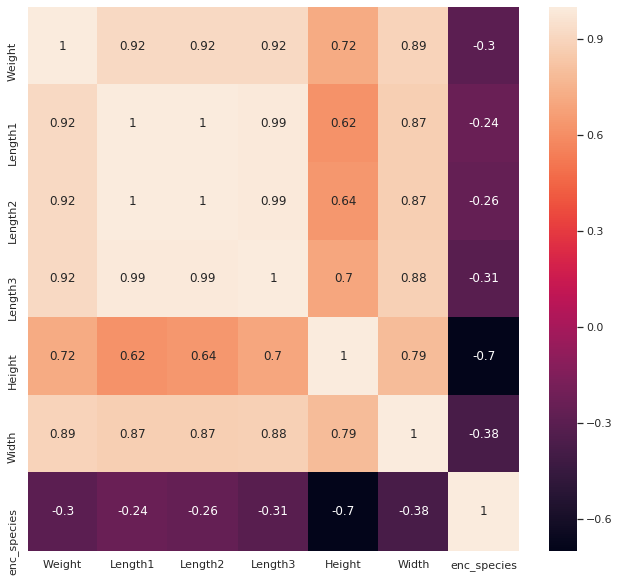

In [92]:
correlation_matrix = df.corr().round(2)
print(correlation_matrix)
plt.figure(figsize=(11,10))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [97]:
X = df.drop(['Species','Weight'],axis=1)
y = df['Weight']

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(X)

ValueError: ignored

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_train_pred = lr.predict(X_train)
train_score = lr.score(X_train, y_train)
print(train_score)

y_test_pred = lr.predict(X_test)
test_score = lr.score(X_test, y_test)
print(test_score)

0.8976982157779284
0.8617651116297175


In [73]:
train_scores = []
test_scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(x_poly2,y,test_size=0.2)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_train_pred = lr.predict(X_train)
    train_score = lr.score(X_train, y_train)
    train_scores.append(train_score)
    
    y_test_pred = lr.predict(X_test)
    test_score = lr.score(X_test, y_test)
    test_scores.append(test_score)

print(sum(train_scores)/len(train_scores))
print(sum(test_scores)/len(test_scores))

0.9659408653859749
0.9298662194729439


In [74]:
lr.score(x_poly2,y)

0.9700787582605993

In [0]:
pred = lr.predict(x_poly2)

In [0]:
scores = []
for i in range(len(pred)):
  if y[i] == 0: continue
  scores.append(abs(y[i]-pred[i])/y[i])


In [78]:
np.mean(np.abs((y - pred) / y)) * 100

inf